In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sqlite3

In [87]:
# Connect to  SQLite database
conn = sqlite3.connect('crash_data.db')

In [88]:
driver_gender = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Person Gender` FROM crashes WHERE `Person Type` = '1 - DRIVER'", conn)

In [89]:
gender_counts = driver_gender.groupby('Person Gender').count()

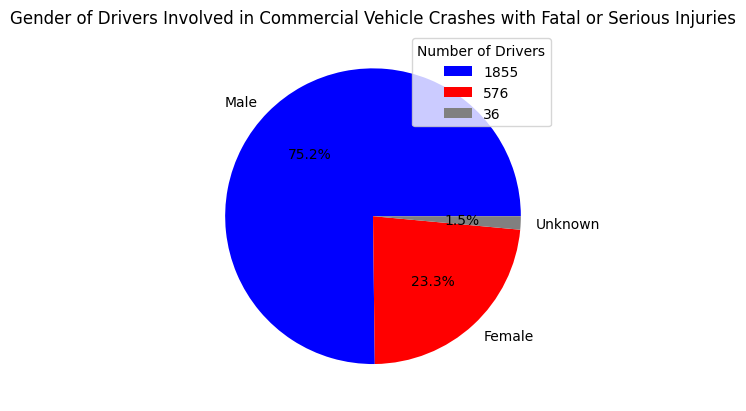

In [90]:
# Pie Chart
labels=['Male', 'Female', 'Unknown']
colors = ['blue', 'red', 'grey']
sizes = gender_counts['Crash ID']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Gender of Drivers Involved in Commercial Vehicle Crashes with Fatal or Serious Injuries')
plt.legend(title='Number of Drivers', loc='upper right', labels=sizes)
plt.show()

In [91]:
fatal_driver_gender = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Person Gender` FROM crashes WHERE `Person Type` = '1 - DRIVER' AND `Person Injury Severity` = 'K - FATAL INJURY'", conn)

In [92]:
fatal_gender_counts = fatal_driver_gender.groupby('Person Gender').count()

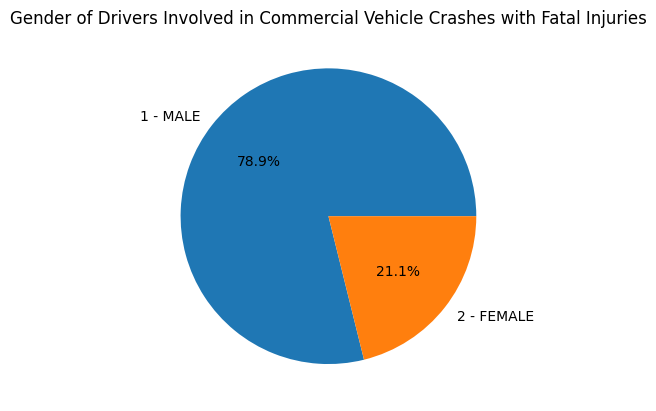

In [93]:
# Pie Chart
plt.pie(fatal_gender_counts['Crash ID'], labels=fatal_gender_counts.index, autopct='%1.1f%%')
plt.title('Gender of Drivers Involved in Commercial Vehicle Crashes with Fatal Injuries')
plt.show()

## 15.7% of all professional truck drivers are women, while 84.3% are men. 
# The average age of an employed professional truck driver is 47 years old.
# https://www.zippia.com/professional-truck-driver-jobs/demographics/

In [94]:
# Bin age groups
age_bins = [0, 15, 19, 24, 34, 44, 54, 64, 74, 84, 94, 150]
age_labels = ['<16', '16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '>=95']


In [95]:
# Get data for serious injuries and fatal injuries by age group
serious_injuries = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Person Age`, `Person Injury Severity` FROM crashes WHERE `Person Injury Severity` = 'A - SUSPECTED SERIOUS INJURY' AND `Person Type` = '1 - DRIVER'", conn)
fatal_injuries = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Person Age`, `Person Injury Severity` FROM crashes WHERE `Person Injury Severity` = 'K - FATAL INJURY' AND `Person Type` = '1 - DRIVER'", conn)

# Bin age groups for both injury types
serious_injuries['Age Group'] = pd.cut(serious_injuries['Person Age'], bins=age_bins, labels=age_labels, include_lowest=True)
fatal_injuries['Age Group'] = pd.cut(fatal_injuries['Person Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Get counts for each age group for both injury types
serious_injury_counts = serious_injuries['Age Group'].value_counts().sort_index()
fatal_injury_counts = fatal_injuries['Age Group'].value_counts().sort_index()

# Combine counts with concat
combined_counts = pd.concat([serious_injury_counts, fatal_injury_counts], axis=1)
combined_counts.columns = ['Serious Injury', 'Fatal Injury']

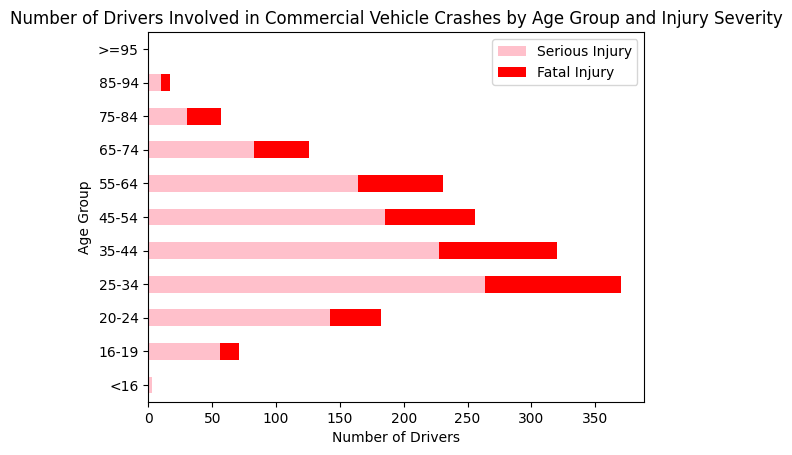

In [96]:
combined_counts.plot(kind='barh', stacked=True, color=['pink', 'red'])
plt.xlabel('Number of Drivers')
plt.ylabel('Age Group')
plt.title('Number of Drivers Involved in Commercial Vehicle Crashes by Age Group and Injury Severity')
plt.show()

In [97]:
contributing_factors = pd.read_sql_query("SELECT `Contributing Factor 1` FROM crashes", conn)

top_contributing_factors = contributing_factors.value_counts().head(10)

top_contributing_factors

Contributing Factor 1                            
22 - FAILED TO CONTROL SPEED                         599
98 - OTHER (EXPLAIN IN NARRATIVE)                    330
23 - FAILED TO DRIVE IN SINGLE LANE                  268
35 - FAILED TO YIELD RIGHT OF WAY - STOP SIGN        246
60 - UNSAFE SPEED                                    167
20 - DRIVER INATTENTION                              117
34 - FAILED TO YIELD RIGHT OF WAY - PRIVATE DRIVE     97
15 - DISREGARD STOP AND GO SIGNAL                     88
70 - WRONG SIDE - NOT PASSING                         84
4 - CHANGED LANE WHEN UNSAFE                          81
dtype: int64

In [98]:
surface_conditions = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Surface Condition` FROM crashes", conn)

top_surface_conditions = surface_conditions['Surface Condition'].value_counts().head(10)

top_surface_conditions

DatabaseError: Execution failed on sql 'SELECT DISTINCT `Crash ID`, `Surface Condition` FROM crashes': no such column: Surface Condition

In [ ]:
# Weather Conditions for Fatal Injury Crashes
fatal_weather_conditions = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Weather Condition` FROM crashes WHERE `Person Injury Severity` = 'K - FATAL INJURY'", conn)

fatal_top_weather_conditions = fatal_weather_conditions['Weather Condition'].value_counts().head(10)

fatal_top_weather_conditions

1 - CLEAR                480
2 - CLOUDY                81
3 - RAIN                  40
6 - FOG                    7
8 - SEVERE CROSSWINDS      4
5 - SNOW                   3
99 - UNKNOWN               1
7 - BLOWING SAND/SNOW      1
Name: Weather Condition, dtype: int64

In [ ]:
# Weather Conditions 
weather_conditions = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Weather Condition` FROM crashes", conn)

top_weather_conditions = weather_conditions['Weather Condition'].value_counts().head(10)

top_weather_conditions

1 - CLEAR                            1494
2 - CLOUDY                            266
3 - RAIN                              119
6 - FOG                                18
8 - SEVERE CROSSWINDS                   8
5 - SNOW                                6
4 - SLEET/HAIL                          6
98 - OTHER (EXPLAIN IN NARRATIVE)       6
7 - BLOWING SAND/SNOW                   4
99 - UNKNOWN                            3
Name: Weather Condition, dtype: int64

In [ ]:
speed_limit_counts = pd.read_sql_query("SELECT `Speed Limit`, COUNT(DISTINCT `Crash ID`) as Crash_Count FROM crashes GROUP BY `Speed Limit`", conn)

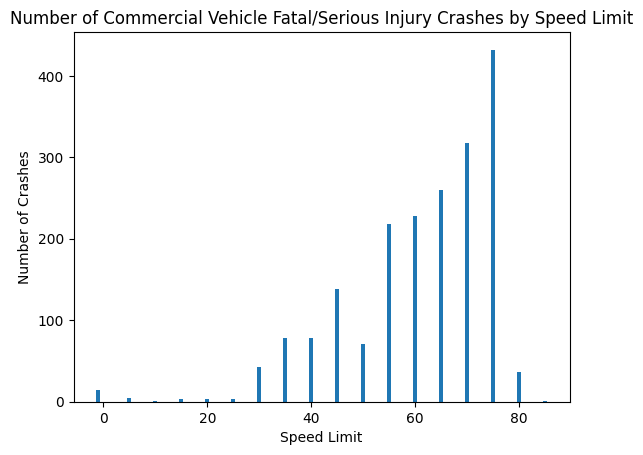

In [ ]:
plt.bar(speed_limit_counts['Speed Limit'], speed_limit_counts['Crash_Count'])
plt.xlabel('Speed Limit')
plt.ylabel('Number of Crashes')
plt.title('Number of Commercial Vehicle Fatal/Serious Injury Crashes by Speed Limit')
plt.show()

In [ ]:
# Read the data from the 'crashes' table
crash_data = pd.read_sql_query("SELECT * FROM crashes", conn)

# Extract the hour from the Crash Time column
crash_data['Hour'] = crash_data['Crash Time'].apply(lambda x: int(x.split(':')[0]))

# Group the data by 'Day of Week' and 'Hour', and count the number of distinct Crash IDs
grouped_data = crash_data.groupby(['Day of Week', 'Hour'])['Crash ID'].nunique().reset_index(name='Crash_Count')

# Pivot the data to create a DataFrame with 'Hour' as the index, and each day of the week as a separate column
pivoted_data = grouped_data.pivot_table(index='Hour', columns='Day of Week', values='Crash_Count', fill_value=0)


In [ ]:
total_crashes = grouped_data['Crash_Count'].sum()
total_crashes

1930

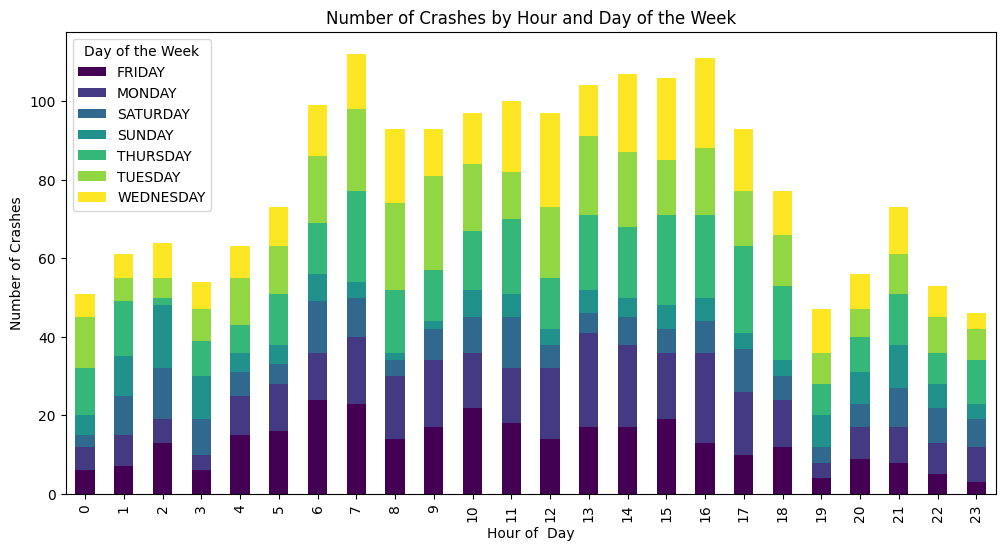

In [ ]:
# Stacked bar graph
ax = pivoted_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
ax.set_xlabel('Hour of  Day')
ax.set_ylabel('Number of Crashes')
ax.set_title('Number of Crashes by Hour and Day of the Week')
plt.xticks(range(0, 24), range(0, 24))
plt.legend(title='Day of the Week')
plt.show()

In [ ]:
# Get data for serious injuries and fatal injuries by restraint type
restraint_serious_injuries = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Person Restraint Used`, `Person Injury Severity` FROM crashes WHERE `Person Injury Severity` = 'A - SUSPECTED SERIOUS INJURY' AND `Person Type` = '1 - DRIVER'", conn)
restraint_fatal_injuries = pd.read_sql_query("SELECT DISTINCT `Crash ID`, `Person Restraint Used`, `Person Injury Severity` FROM crashes WHERE `Person Injury Severity` = 'K - FATAL INJURY' AND `Person Type` = '1 - DRIVER'", conn)

# Get counts for each restraint type for both injury types
restraint_serious_injury_counts = restraint_serious_injuries['Person Restraint Used'].value_counts().sort_index()
restraint_fatal_injury_counts = restraint_fatal_injuries['Person Restraint Used'].value_counts().sort_index()


# Combine counts with concat
restraint_combined_counts = pd.concat([restraint_serious_injury_counts, restraint_fatal_injury_counts], axis=1)
restraint_combined_counts.columns = ['Serious Injury', 'Fatal Injury']

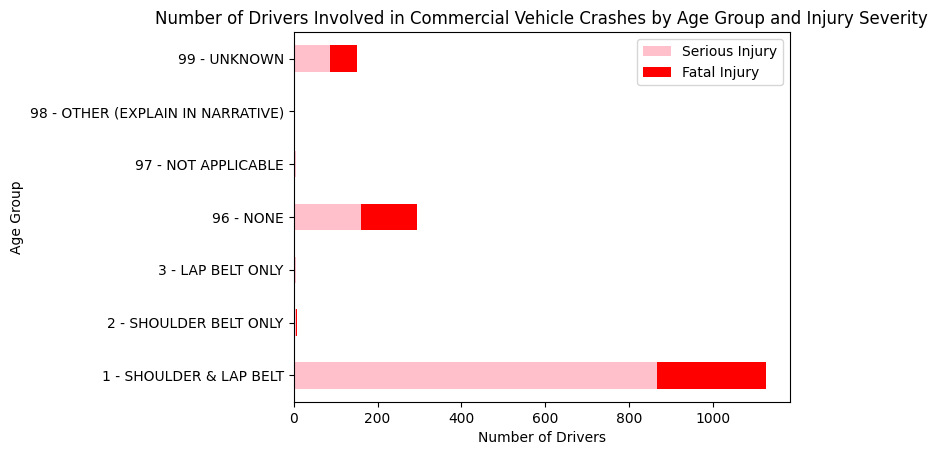

In [ ]:
restraint_combined_counts.plot(kind='barh', stacked=True, color=['pink', 'red'])
plt.xlabel('Number of Drivers')
plt.ylabel('Age Group')
plt.title('Number of Drivers Involved in Commercial Vehicle Crashes by Age Group and Injury Severity')
plt.show()

In [ ]:
# Close the SQLite connection
# conn.close()